## 問題

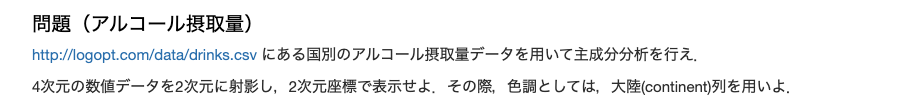

In [1]:
from IPython.display import Image
Image('alcohol.png')

## 解答

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
alcohol = pd.read_csv('http://logopt.com/data/drinks.csv')
alcohol.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [4]:
X = alcohol.drop(['country', 'continent'], axis=1)
X.head(3)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7


In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled[:3]

array([[-1.05233793, -0.91981765, -0.62209388, -1.25337739],
       [-0.17010802,  0.57924034,  0.05722951,  0.04859866],
       [-0.80452054, -0.91981765, -0.445973  , -1.06738081]])

### PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
pca.components_

array([[ 0.53340487,  0.41719672,  0.44015294,  0.58965373],
       [-0.06215686,  0.74719858, -0.6613471 ,  0.02123254]])

In [8]:
Z = pca.transform(X_scaled)
Z[:3]

array([[-1.95794219, -0.23706884],
       [ 0.20476684,  0.40656424],
       [-1.63856149, -0.36500024]])

In [9]:
alcohol['X'] = Z[:, 0]
alcohol['Y'] = Z[:, 1]
alcohol.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,X,Y
0,Afghanistan,0,0,0,0.0,Asia,-1.957942,-0.237069
1,Albania,89,132,54,4.9,Europe,0.204767,0.406564
2,Algeria,25,0,14,0.7,Africa,-1.638561,-0.365000


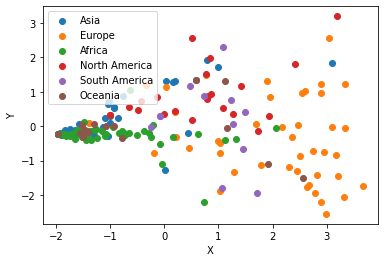

In [10]:
continents = alcohol['continent'].unique()

_, ax = plt.subplots(nrows=1, ncols=1)

for cont in continents:
    cont_data = alcohol[alcohol['continent'] == cont]
    ax.scatter(cont_data['X'], cont_data['Y'], label=cont)

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

### t-SNE

In [11]:
from sklearn.manifold import TSNE

In [12]:
Z = TSNE(n_components=2, random_state=0).fit_transform(X_scaled)
Z[:3]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[-5.9713717, 13.655449 ],
       [ 0.767229 , -3.8320117],
       [-3.410206 ,  8.87265  ]], dtype=float32)

In [13]:
alcohol['X'] = Z[:, 0]
alcohol['Y'] = Z[:, 1]

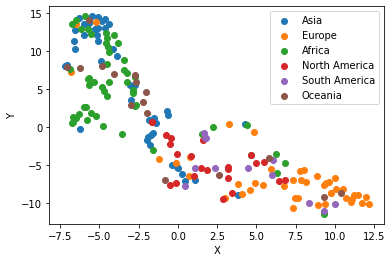

In [14]:
continents = alcohol['continent'].unique()

_, ax = plt.subplots(nrows=1, ncols=1)

for cont in continents:
    cont_data = alcohol[alcohol['continent'] == cont]
    ax.scatter(cont_data['X'], cont_data['Y'], label=cont)

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()